12/14/18
Data generated by Wenchao

## Import Library

In [2]:
# Project specific libraries
library(limma)
library(edgeR)
library(DESeq2)
library(reshape2)
library(ggplot2)

In [3]:
# Import Lib for exixting scripts
library(devtools)
library(roxygen2)

#### Working directory

In [4]:
# DFCI
setwd ("Z:/Ajit/wenchao data")

## Import data

In [5]:
data <- read.table("RawData.txt", header=T, sep="\t")
pdata <- read.table("pdata.txt", header=T, sep="\t")

### Pre-processing

In [8]:
# Remove transcripts that are not expressed in 3 or more samples
#data <- data[rowSums(data[2:ncol(data)])!=0, ]
data <- data[apply(data[2:ncol(data)] == 0, 1, sum) <= 3, ]
dim (data)

[1] 8972   19

In [9]:
# Merge multiple transcripts into one gene
# Import function
source_url("https://raw.githubusercontent.com/ajitjohnson/Jupyter-Notebooks/master/r_scripts/collapse_to_one_gene.R")
# Merge
data_merged <- genesummary (data)
dim(data_merged)
head(data_merged)

SHA-1 hash of file is a0c6a4622daa5b3775f335059a29d6224d9f4032


[1] 8972   18

,P1_DMSO,P2_DMSO,P3_DMSO,P1_Len,P2_Len,P3_Len,P1_Pom,P2_Pom,P3_Pom,R1_DMSO,R2_DMSO,R3_DMSO,R1_Len,R2_Len,R3_Len,R1_Pom,R2_Pom,R3_Pom
AAAS,23,15,8,9,8,0,11,12,2,12,14,17,8,2,9,13,14,23
AACS,12,12,11,6,6,0,10,21,4,4,5,3,3,1,16,9,1,6
AAED1,20,25,20,12,9,2,14,17,5,17,11,8,11,3,16,14,16,6
AAGAB,8,11,14,7,9,1,12,8,4,7,19,10,2,5,20,9,12,14
AAK1,17,17,12,15,24,3,13,13,1,13,12,6,15,9,6,10,17,13
AAMDC,4,3,3,3,4,2,8,5,1,2,2,2,1,0,3,3,3,4


estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


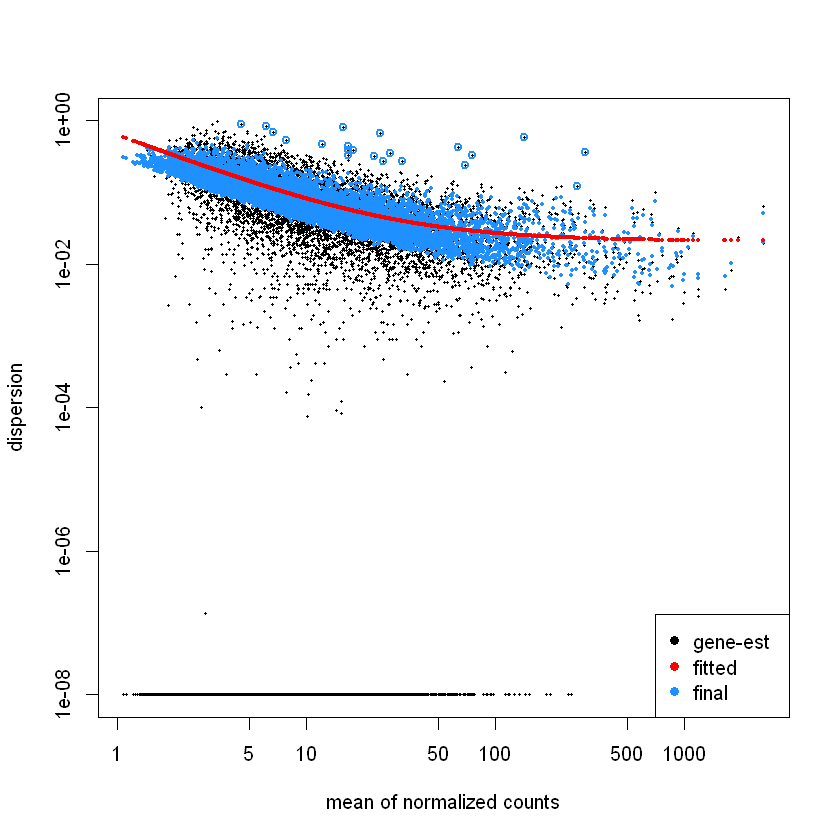

In [11]:
# Normalise data using limma-voom
# Create design matrix
#design <- model.matrix(~ pdata$Resistance)
# Apply voom transformation
#nf <- calcNormFactors(data_merged)
#v <- voom(data_merged, design, lib.size=colSums(data_merged)*nf, normalize.method="quantile", plot=TRUE)

# Normalise data using DE-Seq
dds <- DESeqDataSetFromMatrix(countData = data_merged, colData = pdata, design = ~ Treatment + Resistance)
dds <- DESeq(dds)
plotDispEsts(dds)

# EdgeR normalisation
#dge <- DGEList(counts=data_merged, group=pdata$Resistance)
# Normalize by total count
#dge <- calcNormFactors(dge)
# Create the contrast matrix
#design.mat <- model.matrix(~ 0 + dge$samples$group)
#colnames(design.mat) <- levels(dge$samples$group)
# Estimate dispersion parameter for GLM
#dge <- estimateGLMCommonDisp(dge, design.mat)
#dge <- estimateGLMTrendedDisp(dge, design.mat, method="power")
#dge<- estimateGLMTagwiseDisp(dge,design.mat)
#plotBCV(dge)

In [12]:
# Normalize the data by rlog method for other analysis
rld <- rlog(dds, blind=FALSE)

In [13]:
# Extract the normalised data from the deseq file
#n_data <- data.frame(counts(dds, normalized=TRUE))
n_data <- data.frame(assay(rld))
head(n_data)

,P1_DMSO,P2_DMSO,P3_DMSO,P1_Len,P2_Len,P3_Len,P1_Pom,P2_Pom,P3_Pom,R1_DMSO,R2_DMSO,R3_DMSO,R1_Len,R2_Len,R3_Len,R1_Pom,R2_Pom,R3_Pom
AAAS,3.671929,3.275507,2.850717,2.935623,2.768541,2.828600,3.050357,3.081495,3.071955,3.088215,3.172411,3.571823,3.572597,2.793540,2.901428,3.163444,3.298136,3.710470
AACS,2.773457,2.765474,2.732351,2.342137,2.265639,2.265641,2.645112,3.237126,2.920459,2.108793,2.180829,2.122380,2.527620,2.178140,3.014624,2.558103,1.818384,2.338692
AAED1,3.644415,3.849744,3.677434,3.248145,2.943339,3.420357,3.342119,3.469888,3.702957,3.477391,3.089231,3.086235,3.987633,3.078497,3.445062,3.326458,3.518868,2.796051
AAGAB,2.738518,2.948391,3.174986,2.690805,2.758531,2.896398,3.032873,2.717261,3.275351,2.643149,3.354794,3.043558,2.712322,3.084167,3.461896,2.811156,3.089815,3.179975
AAK1,3.478724,3.469144,3.219180,3.411358,3.730057,3.572530,3.263271,3.227083,3.033199,3.234179,3.134388,2.892474,4.278427,3.728627,2.745367,3.051078,3.555039,3.287603
AAMDC,1.358578,1.240299,1.258591,1.263190,1.325191,1.675409,1.750704,1.450659,1.377272,1.114112,1.098350,1.193114,1.269339,1.057133,1.245258,1.242500,1.278049,1.376754


## Data quality assessment by sample clustering and visualization 


Attaching package: 'cowplot'

The following object is masked from 'package:ggplot2':

    ggsave

No id variables; using all as measure variables
No id variables; using all as measure variables
Warning message:
"Removed 6476 rows containing non-finite values (stat_boxplot)."

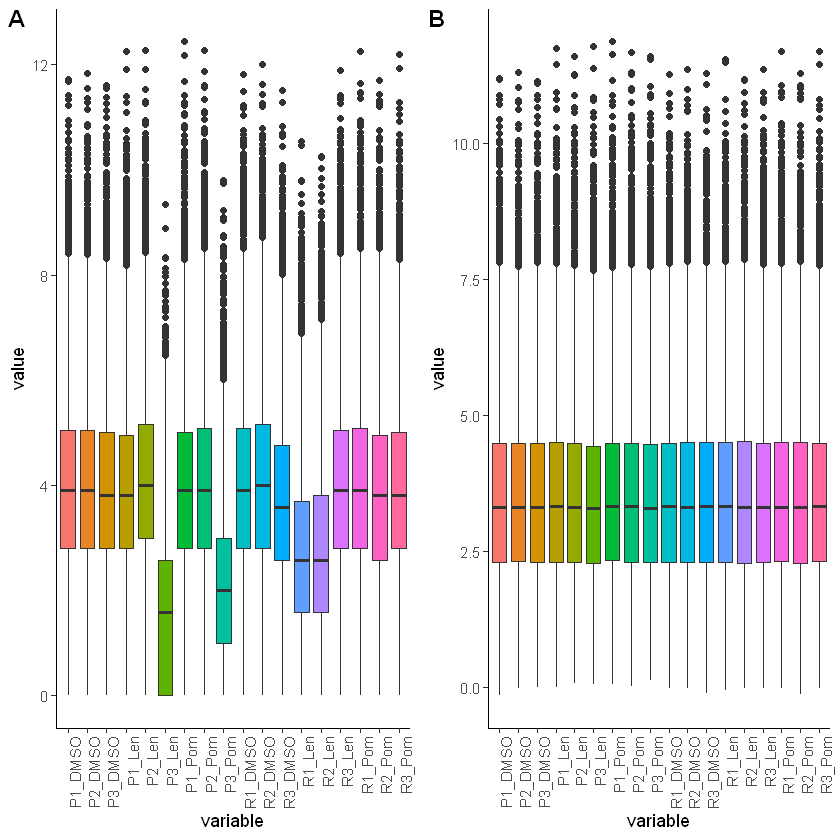

In [14]:
# Vizulaize expression profile before and after normalization
library(cowplot)

p1 <- ggplot(data = melt(log2(data_merged)), aes(x=variable, y=value)) + geom_boxplot(aes(fill=variable))+
      theme_classic()+
      theme(legend.position="none", axis.text.x = element_text(angle = 90, hjust = 1))
# After normalization
p2 <- ggplot(data = melt(n_data), aes(x=variable, y=value)) + geom_boxplot(aes(fill=variable))+
      theme_classic()+
      theme(legend.position="none", axis.text.x = element_text(angle = 90, hjust = 1))

plot_grid(p1, p2, labels = "AUTO")


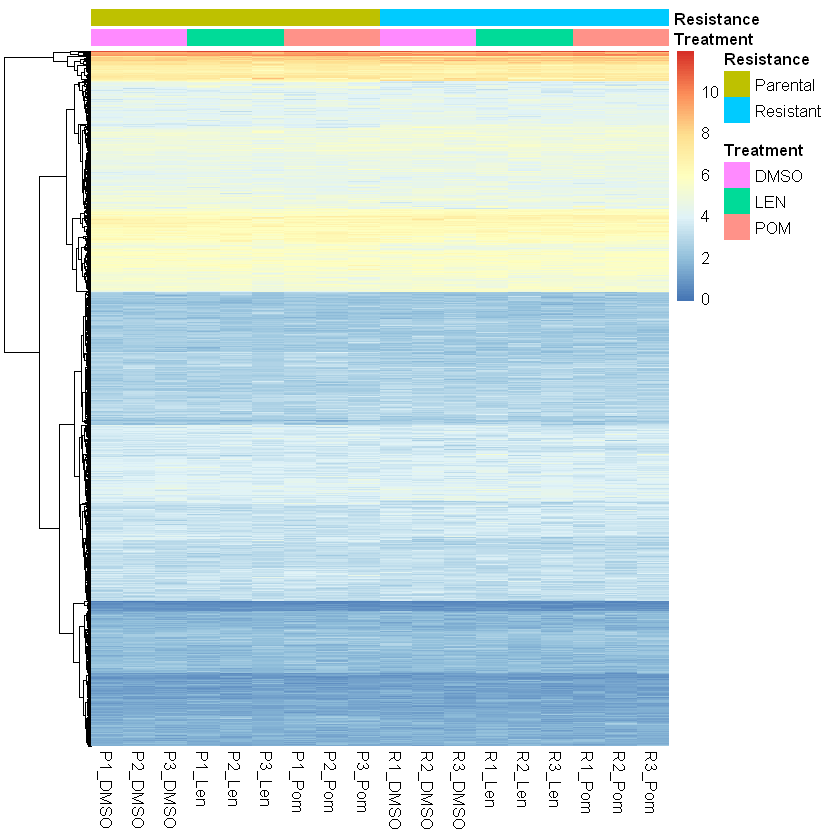

In [15]:
# Heatmap of the count matrix
library("pheatmap")
select <- order(rowMeans(counts(dds,normalized=TRUE)),
                decreasing=TRUE)
df <- as.data.frame(colData(dds)[,c("Treatment","Resistance")])
pheatmap(assay(rld)[select,], cluster_rows=TRUE, show_rownames=FALSE,
         cluster_cols=FALSE, annotation_col=df)

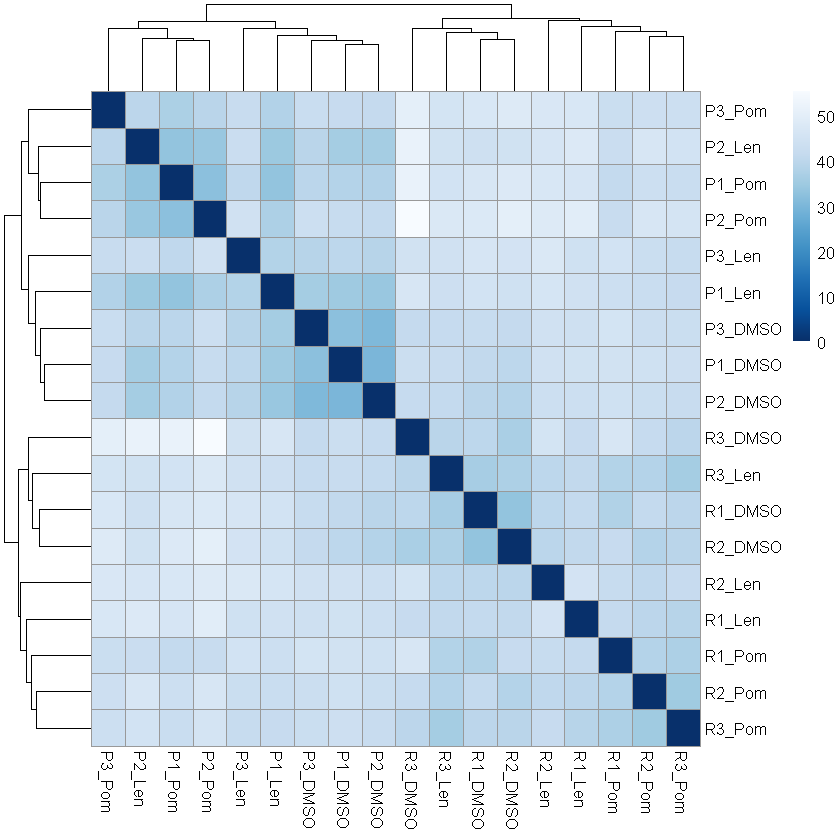

In [16]:
# Heatmap of the sample-to-sample distances
sampleDists <- dist(t(assay(rld)))
# Heatmap
library("RColorBrewer")
sampleDistMatrix <- as.matrix(sampleDists)
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows=sampleDists,
         clustering_distance_cols=sampleDists,
         col=colors)

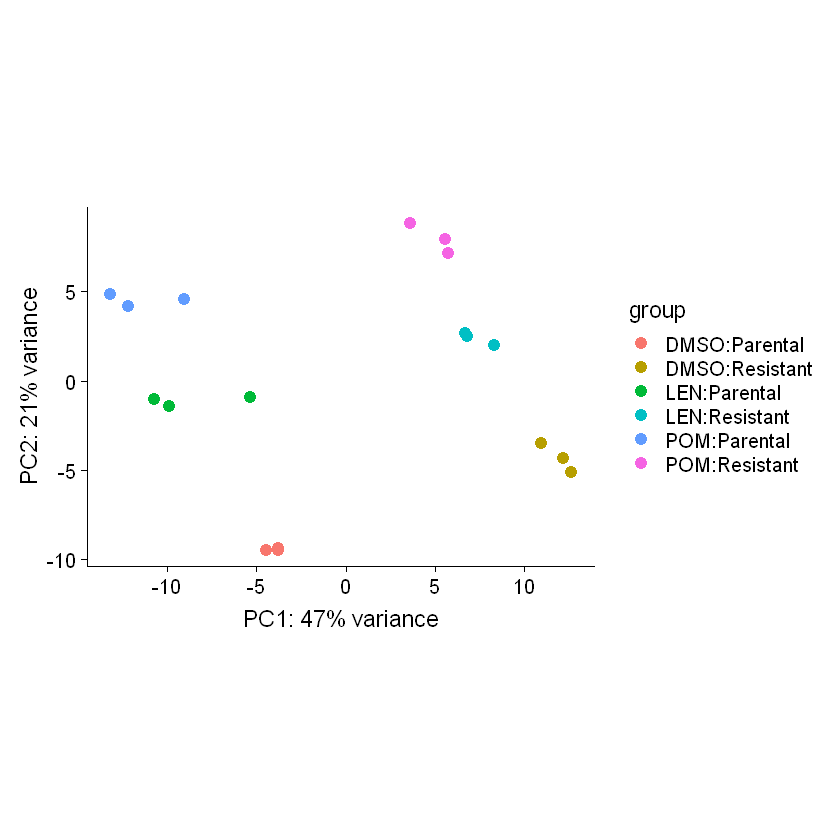

In [17]:
# Plot PCA
plotPCA(rld, intgroup=c("Treatment","Resistance"))

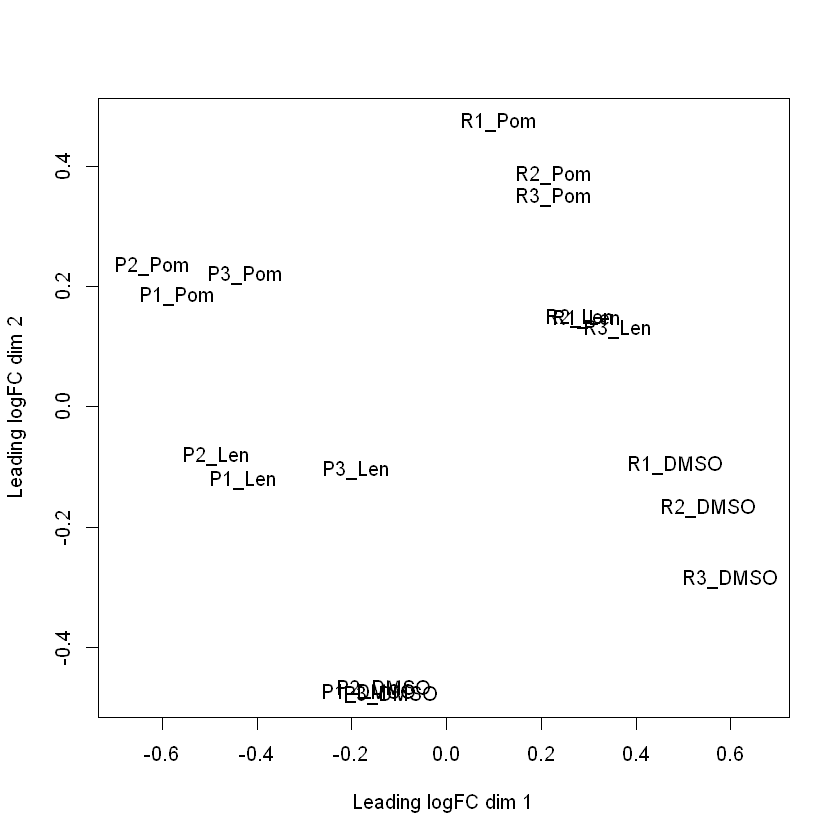

In [18]:
# Multidimensional scaling (MDS)
plotMDS(n_data)

## Differential gene expression analysis

In [41]:
# Results
res <- results(dds)
res

log2 fold change (MLE): Resistance Resistant vs Parental 
Wald test p-value: Resistance Resistant vs Parental 
DataFrame with 8972 rows and 6 columns
               baseMean      log2FoldChange             lfcSE
              <numeric>           <numeric>         <numeric>
AAAS    8.9736581454577   0.342599647292942 0.286852395701988
AACS   5.96755363249809  -0.824944536227357 0.396483687144807
AAED1  11.2105717389192   -0.27858085361327 0.273404163244644
AAGAB  8.15046150108002   0.344181980614843 0.293013218092002
AAK1   11.1134136942571 -0.0789027354036873 0.287185986205957
...                 ...                 ...               ...
ZXDC   4.93478256721758    1.59745770284082 0.419532334675713
ZYG11B  8.9867968316071    0.15774887363057 0.289706827767862
ZYX    22.9530223068537   0.478202658273611 0.182763204405466
ZZEF1   3.2691623622525   0.130051348549491 0.468522356340183
ZZZ3   10.4880433106417  0.0627686377292221 0.237327499020734
                     stat               pval

In [23]:
resLFC <- lfcShrink(dds, coef="Resistance_Resistant_vs_Parental", type="apeglm")
resOrdered <- resLFC[order(resLFC$padj),]
resOrdered

using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    bioRxiv. https://doi.org/10.1101/303255


log2 fold change (MAP): Resistance Resistant vs Parental 
Wald test p-value: Resistance Resistant vs Parental 
DataFrame with 8972 rows and 5 columns
                baseMean      log2FoldChange              lfcSE
               <numeric>           <numeric>          <numeric>
C6orf48 266.709212358637    2.92143792513832  0.137536271504392
CSNK2B  187.817115960673    1.72054959328364 0.0818568994478154
RGS16   168.974089317636    2.59944606876136  0.166668494410846
FLOT1   142.435693704294    1.56843523312442 0.0996941524104103
BAG6    112.250579440066    1.60778091907579  0.103791100915315
...                  ...                 ...                ...
ZNF721  2.18997671212199   0.148260935261205  0.292632938954104
ZNF75A  1.52066329063576   0.196862618264883  0.340828088350871
ZNF75D  1.71169432034955 -0.0163134101932445  0.264980983002772
ZNF815P 2.12034251594574   0.216565574051899  0.341756510873884
ZUFSP   2.20809180884309 0.00570759970926643  0.259568583385602
                  

In [25]:
summary(resOrdered)


out of 8972 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 814, 9.1%
LFC < 0 (down)     : 805, 9%
outliers [1]       : 0, 0%
low counts [2]     : 348, 3.9%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



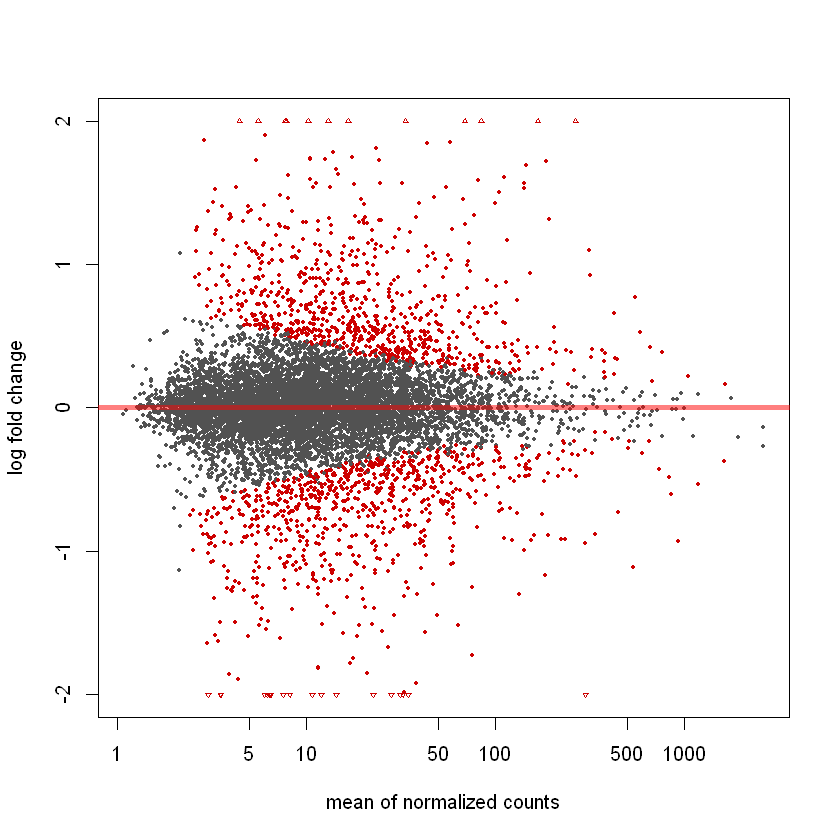

In [28]:
plotMA(resLFC, ylim=c(-2,2))

In [36]:
# Subset genes with a significant P value (<0.05)
sig_genes <- row.names(resLFC[which(resLFC$padj <= 0.05), ])

[1] "ABCA1"   "ABCA17P" "ABCF1"   "ABCF3"   "ABRACL"  "ABT1"

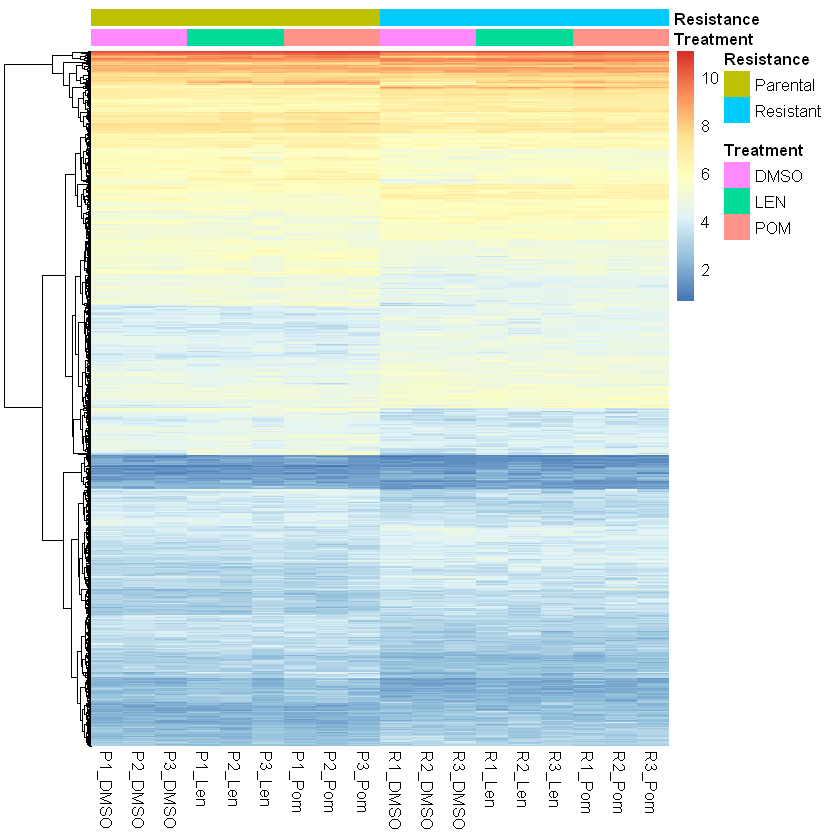

In [40]:
# Heat map of the significant genes (DEG)
df <- as.data.frame(colData(dds)[,c("Treatment","Resistance")])
pheatmap(assay(rld)[sig_genes,], cluster_rows=TRUE, show_rownames=FALSE,
         cluster_cols=FALSE, annotation_col=df)

## Export data

In [42]:
# Export normalized matrix
write.csv(n_data, file = "Normalized_Data.csv")
# Export DEG matrix
write.csv(res, file = "DEG_results.csv")

## Looking for DEG's only using control samples (Parental vs Resistant)

In [42]:
include_list <- c("P1_DMSO","P2_DMSO","P3_DMSO","R1_DMSO","R2_DMSO","R3_DMSO")
control_data <- data[,c("gene", include_list)]
control_pdata <- pdata [pdata$Samples  %in% include_list, ]

In [43]:
control_pdata

,Samples,Resistance,Treatment,nodesign
1,P1_DMSO,Parental,DMSO,P_DMSO
2,P2_DMSO,Parental,DMSO,P_DMSO
3,P3_DMSO,Parental,DMSO,P_DMSO
10,R1_DMSO,Resistant,DMSO,R_DMSO
11,R2_DMSO,Resistant,DMSO,R_DMSO
12,R3_DMSO,Resistant,DMSO,R_DMSO


SHA-1 hash of file is a0c6a4622daa5b3775f335059a29d6224d9f4032
estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
SHA-1 hash of file is ea705fcd7367ec2f0f16b7660c0ae5b75421a27c
No id variables; using all as measure variables
No id variables; using all as measure variables
Warning message:
"Removed 6749 rows containing non-finite values (stat_boxplot)."

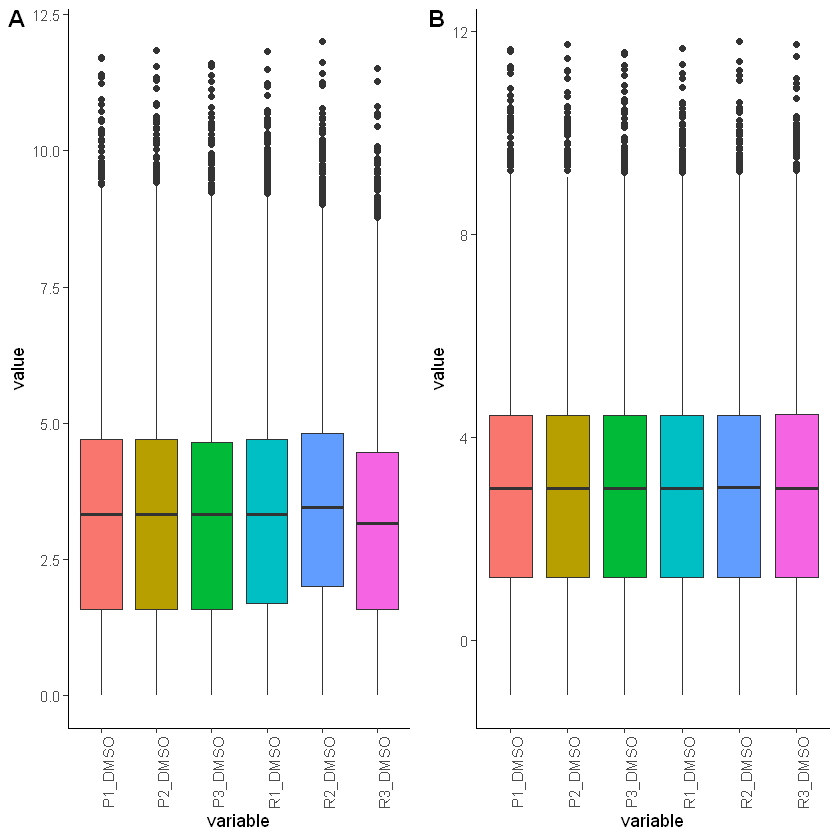

In [46]:
# Remove transcripts that are not expresed in three or more samples
control_data <- control_data[apply(control_data[2:ncol(control_data)] == 0, 1, sum) <= 3, ]
# Merge multiple transcripts into one gene
# Import function for merging transcripts into gene
source_url("https://raw.githubusercontent.com/ajitjohnson/Jupyter-Notebooks/master/r_scripts/collapse_to_one_gene.R")
# Merge
control_data_merged <- genesummary (control_data)
# Normalise data using DE-Seq
c_dds <- DESeqDataSetFromMatrix(countData = control_data_merged, colData = control_pdata, design = ~ Resistance)
c_dds <- DESeq(c_dds)
#plotDispEsts(c_dds)
# Normalize the data by rlog method for other analysis
c_rld <- rlog(c_dds, blind=FALSE)
# Extract the normalised data from the deseq file
c_n_data <- data.frame(assay(c_rld))
# Import function for plotting before and after normalisation image
source_url("https://raw.githubusercontent.com/ajitjohnson/Jupyter-Notebooks/master/r_scripts/plot_before_after_normalization.R")
# Plot before and after normalization
plotba (control_data_merged,c_n_data)

In [50]:
# Results
c_resLFC <- lfcShrink(c_dds, coef="Resistance_Resistant_vs_Parental", type="apeglm")
c_resOrdered <- c_resLFC[order(c_resLFC$padj),]
summary(c_resOrdered)

using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    bioRxiv. https://doi.org/10.1101/303255



out of 12500 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 142, 1.1%
LFC < 0 (down)     : 137, 1.1%
outliers [1]       : 0, 0%
low counts [2]     : 4120, 33%
(mean count < 4)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



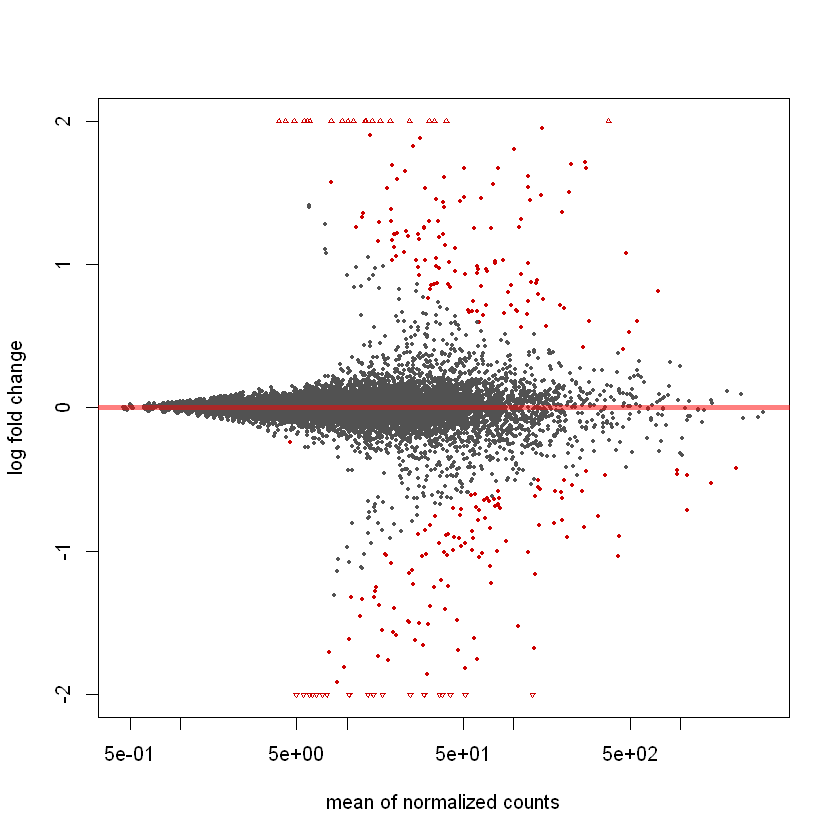

In [51]:
plotMA(b, ylim=c(-2,2))

In [54]:
x= data.frame(c_resLFC)
head(x)

,baseMean,log2FoldChange,lfcSE,pvalue,padj
A4GALT,0.8003944,-0.034139831,0.2269473,0.13283801,NA
AAAS,14.6492707,-0.005481537,0.2054757,0.94488980,0.9998200
AACS,7.5880467,-0.199782129,0.3465998,0.02791202,0.3921303
AADAT,0.7998306,-0.006815292,0.2228300,0.77149469,NA
AAED1,16.2945550,-0.202012691,0.3081335,0.07628852,0.6128202
AAGAB,11.2148962,0.019062444,0.2094162,0.80457614,0.9914815


In [163]:
allgenes <- toTable(org.Hs.egSYMBOL)
# Subset genes with a significant P value (<0.05)
sig_genes <- x[which(x$padj <= 0.05), ]
listEG= merge(allgenes,sig_genes, by.x="symbol", by.y= "row.names")
universeEG <- Lkeys(org.Hs.egGENENAME)
geneList <- factor(as.integer(universeEG %in% listEG$gene_id))
names(geneList) <- universeEG
# Create GO object
sampleGOdata <- new("topGOdata", ontology ="BP", allGenes= geneList, nodeSize= 5, annot = annFUN.org, 
                    mapping = "org.Hs.eg.db", ID = "entrez")
# Run enrichment analysis
resultFisher <- runTest(sampleGOdata, algorithm = "classic", statistic = "fisher")
# Cummlulate into a table
allRes <- GenTable(sampleGOdata, classicFisher = resultFisher, ranksOf = "classicFisher", topNodes = 5)


Building most specific GOs .....
	( 12078 GO terms found. )

Build GO DAG topology ..........
	( 16113 GO terms and 38254 relations. )

Annotating nodes ...............
	( 18493 genes annotated to the GO terms. )


In [175]:
resultFisher <- runTest(sampleGOdata, algorithm = "classic", statistic = "fisher")


			 -- Classic Algorithm -- 

		 the algorithm is scoring 3837 nontrivial nodes
		 parameters: 
			 test statistic: fisher


In [176]:
allRes <- GenTable(sampleGOdata, classicFisher = resultFisher, 
                   ranksOf = "classicFisher", topNodes = 5)

In [177]:
allRes

GO.ID,Term,Annotated,Significant,Expected,classicFisher
GO:0002274,myeloid leukocyte activation,638,27,6.69,7.0e-10
GO:0002443,leukocyte mediated immunity,868,31,9.11,2.1e-09
GO:0045055,regulated exocytosis,788,29,8.27,3.8e-09
GO:0006887,exocytosis,897,31,9.41,4.5e-09
GO:0001775,cell activation,1407,40,14.76,5.4e-09
